<a href="https://colab.research.google.com/github/pmensah28/Machine-Learning-Projects/blob/main/Accident_Severity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APPLYING MACHINE LEARNING ALGORITHMS TO PREDICT ROAD TRAFFIC ACCIDENT SEVERITY - GHANA**


---


In this project we are going to predict the severity of an accident based on a set of features including; road surface condition, weather condition, road features, etc. in Ghana.

### **IMPORT LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

#neural network
import tensorflow as tf
from tensorflow import keras

import plotly.graph_objects as go
from nltk.corpus import stopwords
# supress unnecessary warning, helping your presentation to look great.
import warnings
warnings.filterwarnings('ignore')

### **LOADING THE DATASET**

We are going to import the import the dataset using pandas.

In [ ]:
accident_data=pd.read_csv("/content/drive/MyDrive/Datasets/Accident_2011(1).csv")
accident_data.head()

,Accident_Index,Accident_Severity,Age_of_Driver,Sex_of_Casualty,Number_of_Casualties,Age_Group_of_Casualty,Day_of_Week,Month,Year,Longitude,Latitude,Light_Conditions,Weather_Conditions,Road_Type,Road_Class,Road_Surface_Conditions,Crash_Type,Number_of_Vehicles,Speed_Limit,Urban_or_Rural_Area,Region,Did_Police_Officer_Attend_Scene_of_Accident
0,1991ACC00001,1,37,1,1,4,3,1,1991,NaN,NaN,1,2,2,1,1,9,1,NaN,1,1,1
1,1991ACC00002,1,42,1,1,2,4,1,1991,NaN,NaN,2,1,2,1,1,2,1,NaN,1,1,1
2,1991ACC00003,3,35,1,1,6,5,1,1991,NaN,NaN,2,1,1,1,1,9,2,NaN,1,1,1
3,1991ACC00004,3,62,1,1,6,6,1,1991,NaN,NaN,1,1,2,1,1,1,1,NaN,1,1,1
4,1991ACC00005,3,49,1,1,8,2,1,1991,NaN,NaN,4,2,2,1,1,8,1,NaN,1,1,1


In [ ]:
accident_data.shape

(212167, 22)

## **DATA PREPROCESSING**
We are going to process the data to make it suitable for the models.

### **Correlation betweeen features**

We present the correlation matrix between all the features in the form of an heatmap. Here we observe the correlation between the different features of the dataset, in order to check if some features are highly correlated and drop them. We can also base on that to handle erroneous or missing values

In [ ]:
accident_data.corr()

,Accident_Severity,Age_of_Driver,Sex_of_Casualty,Number_of_Casualties,Age_Group_of_Casualty,Day_of_Week,Month,Year,Longitude,Latitude,...,Weather_Conditions,Road_Type,Road_Class,Road_Surface_Conditions,Crash_Type,Number_of_Vehicles,Speed_Limit,Urban_or_Rural_Area,Region,Did_Police_Officer_Attend_Scene_of_Accident
Accident_Severity,1.000000,-0.001455,0.002823,-0.094020,-0.011218,0.000986,-0.001017,0.074145,NaN,NaN,...,0.014402,-0.068189,0.100680,0.002823,0.002324,0.092456,NaN,-0.050274,0.031392,0.115541
Age_of_Driver,-0.001455,1.000000,0.003126,0.000709,0.002478,0.001381,-0.004362,-0.000117,NaN,NaN,...,-0.003375,-0.000068,-0.002900,0.003126,0.000829,-0.002179,NaN,0.004336,-0.001354,0.000689
Sex_of_Casualty,0.002823,0.003126,1.000000,0.005129,0.015679,-0.000226,0.002383,0.020009,NaN,NaN,...,0.003921,-0.000606,-0.003424,1.000000,0.047302,-0.001455,NaN,0.009028,-0.001756,0.001338
Number_of_Casualties,-0.094020,0.000709,0.005129,1.000000,-0.004463,-0.000714,0.005108,0.004583,NaN,NaN,...,0.038586,0.011263,0.167044,0.005129,-0.001631,0.189137,NaN,0.132054,-0.013105,-0.107269
Age_Group_of_Casualty,-0.011218,0.002478,0.015679,-0.004463,1.000000,0.001114,-0.000198,-0.017435,NaN,NaN,...,-0.003724,-0.001208,0.000621,0.015679,0.456661,0.000393,NaN,-0.010423,-0.001847,-0.003465
Day_of_Week,0.000986,0.001381,-0.000226,-0.000714,0.001114,1.000000,0.012341,0.002793,NaN,NaN,...,0.007315,0.011128,-0.009251,-0.000226,-0.000417,-0.010009,NaN,-0.016404,0.003402,0.001671
Month,-0.001017,-0.004362,0.002383,0.005108,-0.000198,0.012341,1.000000,0.017014,NaN,NaN,...,0.064976,-0.002300,0.013046,0.002383,0.002675,0.012849,NaN,0.007174,-0.025296,-0.013689
Year,0.074145,-0.000117,0.020009,0.004583,-0.017435,0.002793,0.017014,1.000000,NaN,NaN,...,0.041077,0.020496,-0.018396,0.020009,0.018573,-0.014638,NaN,0.191158,-0.002144,-0.007691
Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


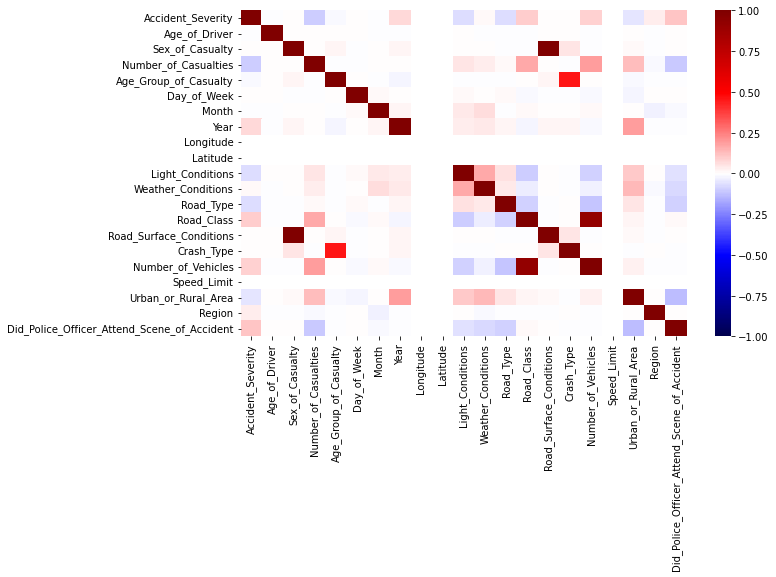

In [ ]:
corr_matrix = accident_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="accident_data", edgecolor="#666")
plt.show()

### **Feature Selection**

Here, we select the best features to help our models learn best. From the observations made with the correlation matrix, we are going to drop the following missing features:

* Logitude
* Latitude
* Speed Limit

In [ ]:
Missing_Values = ['Longitude', 'Latitude', 'Speed_Limit']
accident_data.drop(Missing_Values, axis=1, inplace=True)
accident_data.head()

,Accident_Index,Accident_Severity,Age_of_Driver,Sex_of_Casualty,Number_of_Casualties,Age_Group_of_Casualty,Day_of_Week,Month,Year,Light_Conditions,Weather_Conditions,Road_Type,Road_Class,Road_Surface_Conditions,Crash_Type,Number_of_Vehicles,Urban_or_Rural_Area,Region,Did_Police_Officer_Attend_Scene_of_Accident
0,1991ACC00001,1,37,1,1,4,3,1,1991,1,2,2,1,1,9,1,1,1,1
1,1991ACC00002,1,42,1,1,2,4,1,1991,2,1,2,1,1,2,1,1,1,1
2,1991ACC00003,3,35,1,1,6,5,1,1991,2,1,1,1,1,9,2,1,1,1
3,1991ACC00004,3,62,1,1,6,6,1,1991,1,1,2,1,1,1,1,1,1,1
4,1991ACC00005,3,49,1,1,8,2,1,1991,4,2,2,1,1,8,1,1,1,1


In [ ]:
accident_data.describe()

,Accident_Severity,Age_of_Driver,Sex_of_Casualty,Number_of_Casualties,Age_Group_of_Casualty,Day_of_Week,Month,Year,Light_Conditions,Weather_Conditions,Road_Type,Road_Class,Road_Surface_Conditions,Crash_Type,Number_of_Vehicles,Urban_or_Rural_Area,Region,Did_Police_Officer_Attend_Scene_of_Accident
count,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000,212167.000000
mean,2.828442,35.475446,1.416097,1.350974,5.513115,4.127508,6.670491,2001.921392,1.359919,1.351153,1.470412,1.780564,1.416097,5.050083,1.814910,1.342801,2.981180,1.194583
std,0.427697,12.114611,0.493886,0.802528,1.643565,1.924858,3.442333,5.823755,0.667714,0.604942,0.645386,0.581956,0.493886,2.939443,0.648757,0.475540,2.617039,0.398455
min,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1991.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,27.000000,1.000000,1.000000,4.000000,3.000000,4.000000,1997.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,32.000000,1.000000,1.000000,6.000000,4.000000,7.000000,2002.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,1.000000,2.000000,1.000000
75%,3.000000,43.000000,2.000000,1.000000,7.000000,6.000000,10.000000,2007.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,2.000000,2.000000,4.000000,1.000000
max,3.000000,73.000000,3.000000,35.000000,8.000000,7.000000,12.000000,2011.000000,5.000000,6.000000,3.000000,3.000000,3.000000,11.000000,4.000000,3.000000,10.000000,3.000000


In [ ]:
x=accident_data[["Number_of_Vehicles","Light_Conditions","Weather_Conditions","Road_Surface_Conditions","Urban_or_Rural_Area", "Number_of_Casualties",
"Age_Group_of_Casualty","Crash_Type","Month","Year","Region","Did_Police_Officer_Attend_Scene_of_Accident","Road_Class", "Day_of_Week"]]
y=accident_data["Accident_Severity"]

### **Handeling Imbalance Dataset**

In [ ]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
  dist = round(v / len(y) * 100, 2)
  print(f"Class={k}, n={v} ({dist})")

Class=1, n=4328 (2.04)
Class=3, n=180096 (84.88)
Class=2, n=27743 (13.08)


<BarContainer object of 3 artists>

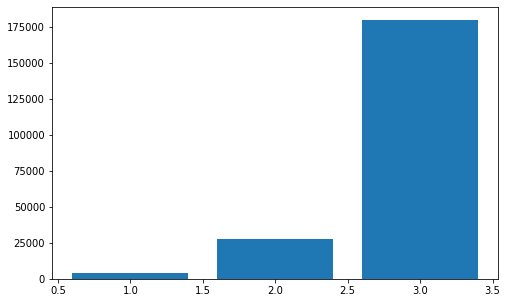

In [ ]:
plt.figure(1, figsize=(8, 5))
plt.bar(counter.keys(), counter.values())

As we can see, the severity class from the plot is highly unbalanced, the number of accident with the severity 1 is very small as compared to the number of accident with severity 3. In order to balance the data we are going to undersample the majority class and oversample the minority class using SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import  Pipeline

In [ ]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample), ("u", undersample)]
pipeline = Pipeline(steps=steps)
x, y =pipeline.fit_resample(x, y)

In [ ]:
counter = Counter(y)
for k,v in counter.items():
  dist = v / len(y) * 100
  print(f"Class={k}, n={v} ({dist})")

Class=1, n=180096 (33.33333333333333)
Class=2, n=180096 (33.33333333333333)
Class=3, n=180096 (33.33333333333333)


<BarContainer object of 3 artists>

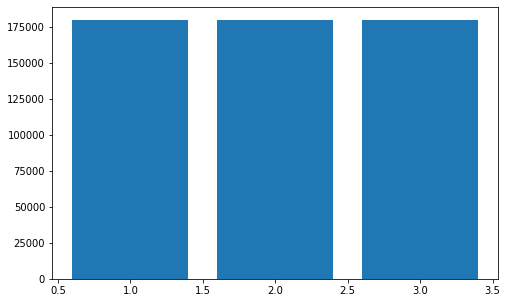

In [ ]:
plt.figure(1, figsize=(8, 5))
plt.bar(counter.keys(), counter.values())

## **Feature scaling**

We are going to scale and normalize the features in order to improve the performance of the models.

In [ ]:
scaler = MinMaxScaler()
features = ["Number_of_Vehicles","Light_Conditions","Weather_Conditions","Road_Surface_Conditions","Urban_or_Rural_Area", "Number_of_Casualties",
"Age_Group_of_Casualty","Crash_Type", "Did_Police_Officer_Attend_Scene_of_Accident","Road_Class", "Day_of_Week","Month","Year"]
accident_data[features] = scaler.fit_transform(accident_data[features])
accident_data.head()

,Accident_Index,Accident_Severity,Age_of_Driver,Sex_of_Casualty,Number_of_Casualties,Age_Group_of_Casualty,Day_of_Week,Month,Year,Light_Conditions,Weather_Conditions,Road_Type,Road_Class,Road_Surface_Conditions,Crash_Type,Number_of_Vehicles,Urban_or_Rural_Area,Region,Did_Police_Officer_Attend_Scene_of_Accident
0,1991ACC00001,1,37,1,0.0,0.428571,0.333333,0.0,0.0,0.00,0.2,2,0.0,0.0,0.8,0.000000,0.0,1,0.0
1,1991ACC00002,1,42,1,0.0,0.142857,0.500000,0.0,0.0,0.25,0.0,2,0.0,0.0,0.1,0.000000,0.0,1,0.0
2,1991ACC00003,3,35,1,0.0,0.714286,0.666667,0.0,0.0,0.25,0.0,1,0.0,0.0,0.8,0.333333,0.0,1,0.0
3,1991ACC00004,3,62,1,0.0,0.714286,0.833333,0.0,0.0,0.00,0.0,2,0.0,0.0,0.0,0.000000,0.0,1,0.0
4,1991ACC00005,3,49,1,0.0,1.000000,0.166667,0.0,0.0,0.75,0.2,2,0.0,0.0,0.7,0.000000,0.0,1,0.0


## **MODELS**

In this section we will test sevaral models to identify the suitable one for this task.
We will use the following models:

* Decision Tree
* Logistic Regression;
* Random Forest
* Artificial Neural Network (ANN)

 In the end, we will show the performance of each model using different metrics: precision, recall and accuracy.

In [ ]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()
# List of classification algorithms
algo_lst=['Random Forest','Logistic Regression','Artificial Neural Network']
# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]
precision_lst=[]
f1Score_lst=[]
recall_lst=[]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=99)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
dt_pred = decision_tree.predict(x_train)
dt_pred1 = decision_tree.predict(x_test)

In [ ]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree1 = round(decision_tree.score(x_test, y_test) * 100, 2)
f1_Score = round(f1_score(y_test, dt_pred1, average='macro') * 100, 2)
P_Score = round(precision_score(y_test, dt_pred1, average='macro') * 100, 2)
R_Score = round(recall_score(y_test, dt_pred1, average='macro') * 100, 2)
# # Append to the accuracy list
# accuracy_lst.append(acc_decision_tree1)
# precision_lst.append(P_Score)
# f1Score_lst.append(f1_Score)
# recall_lst.append(R_Score)

In [ ]:
print("\nTrain Accuracy", acc_decision_tree)
print("Test Accuracy", acc_decision_tree1)
print("F1 Score", f1_Score)
print("Precision Score", P_Score)
print("Recall Score", R_Score)


Train Accuracy 97.26
Test Accuracy 84.49
F1 Score 84.25
Precision Score 84.62
Recall Score 84.5


In [ ]:
print('\nClassification Report for Training\n')
print(classification_report(
    digits=4,
    y_true=y_train, 
    y_pred=dt_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report for Training

              precision    recall  f1-score   support

     Class 1     0.9604    0.9945    0.9772    144067
     Class 2     0.9607    0.9643    0.9625    144145
     Class 3     0.9982    0.9590    0.9782    144018

    accuracy                         0.9726    432230
   macro avg     0.9731    0.9726    0.9726    432230
weighted avg     0.9731    0.9726    0.9726    432230



In [ ]:
print('\nClassification Report for testing\n')
print(classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=dt_pred1, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report for testing

              precision    recall  f1-score   support

     Class 1     0.9084    0.9807    0.9432     36029
     Class 2     0.7703    0.8373    0.8024     35951
     Class 3     0.8599    0.7170    0.7820     36078

    accuracy                         0.8449    108058
   macro avg     0.8462    0.8450    0.8425    108058
weighted avg     0.8463    0.8449    0.8425    108058



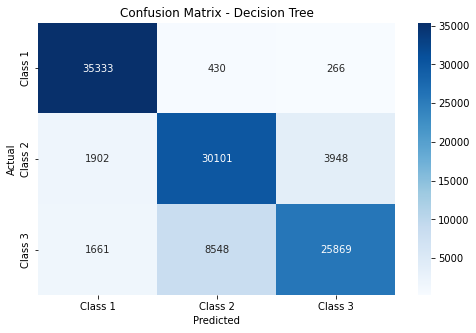

In [ ]:
y_pred = decision_tree.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=dt_pred1)

index = ["Class 1", "Class 2", "Class 3"]
columns = ["Class 1", "Class 2", "Class 3"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

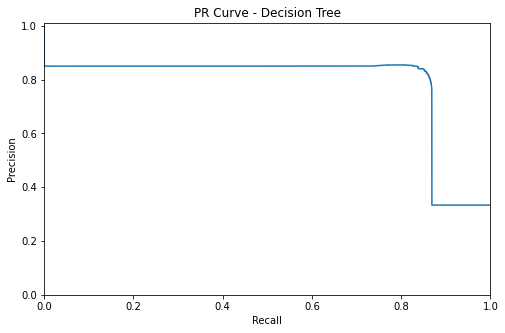

In [ ]:
Y = label_binarize(y_test, classes=[1, 2, 3])

y_score = decision_tree.predict_proba(x_test)

precision["Decision Tree"], recall["Decision Tree"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Decision Tree"], tpr["Decision Tree"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(8, 5))
plt.step(recall["Decision Tree"], precision["Decision Tree"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Decision Tree")
plt.show()

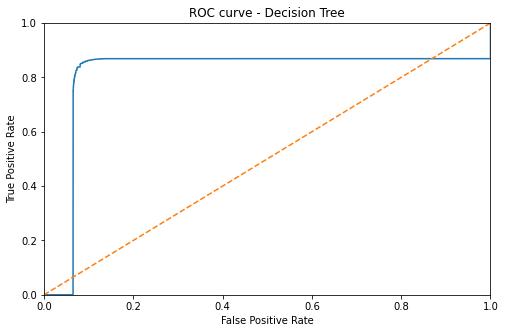

In [ ]:
plt.figure(figsize=(8, 5))
plt.step(fpr["Decision Tree"], tpr["Decision Tree"], where="post")

plt.title("ROC curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1],linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [ ]:
# importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=["importance"], index=x_train.columns)

# importances.iloc[:,0] = decision_tree.feature_importances_

# importances = importances.sort_values(by="importance", ascending=False)[:]

# plt.figure(figsize=(10, 6))
# sns.barplot(x="importance", y=importances.index, data=importances)
# plt.title("Visualizing Important Features - Decision Tree")
# plt.xlabel('Features Importance Score')
# plt.ylabel('Features')
# plt.show()

## **RANDOM FOREST**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(x_train,y_train)
rf_pred = random_forest.predict(x_train)
rf_pred1 = random_forest.predict(x_test)

In [ ]:
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest1 = round(random_forest.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, rf_pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, rf_pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, rf_pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_random_forest1)
precision_lst.append(P_Score2)
f1Score_lst.append(f1_Score2)
recall_lst.append(R_Score2)

In [ ]:
print("\nTrain Accuracy", acc_random_forest)
print("Test Accuracy", acc_random_forest1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 97.26
Test Accuracy 87.89
F1 Score 87.79
Precision Score 87.8
Recall Score 87.89


In [ ]:
print('\nClassification Report for Training\n')
print(classification_report(
    digits=4,
    y_true=y_train, 
    y_pred=rf_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report for Training

              precision    recall  f1-score   support

     Class 1     0.9615    0.9934    0.9772    144067
     Class 2     0.9661    0.9585    0.9623    144145
     Class 3     0.9910    0.9660    0.9784    144018

    accuracy                         0.9726    432230
   macro avg     0.9729    0.9726    0.9726    432230
weighted avg     0.9729    0.9726    0.9726    432230



In [ ]:
print('\nClassification Report for testing\n')
print(classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=rf_pred1, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report for testing

              precision    recall  f1-score   support

     Class 1     0.9319    0.9810    0.9559     36029
     Class 2     0.8320    0.8416    0.8368     35951
     Class 3     0.8699    0.8142    0.8411     36078

    accuracy                         0.8789    108058
   macro avg     0.8780    0.8789    0.8779    108058
weighted avg     0.8780    0.8789    0.8779    108058



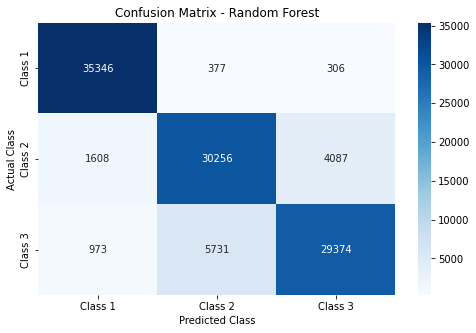

In [ ]:
y_pred = random_forest.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=rf_pred1)

index = ["Class 1", "Class 2", "Class 3"]
columns = ["Class 1", "Class 2", "Class 3"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

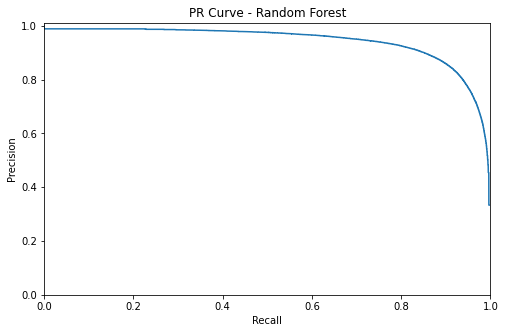

In [ ]:
Y = label_binarize(y_test, classes=[1, 2, 3])

y_score = random_forest.predict_proba(x_test)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(8, 5))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())
roc_auc = auc(fpr["Random Forest"], tpr["Random Forest"])
roc_auc

0.9695676173066632

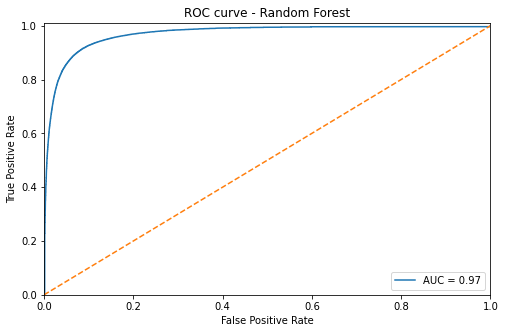

In [ ]:
plt.figure(figsize=(8, 5))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post",label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.legend(loc = 'lower right')
plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [ ]:
# importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=["importance"], index=x_train.columns)

# importances.iloc[:,0] = random_forest.feature_importances_

# importances = importances.sort_values(by="importance", ascending=False)[:]

# plt.figure(figsize=(10, 6))
# sns.barplot(x="importance", y=importances.index, data=importances)
# plt.title("Visualizing Important Features - Random Forest")
# plt.xlabel('Features Importance Score')
# plt.ylabel('Features')
# plt.show()

## **LOGISTIC REGRESSION**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)  #fit the model on the data.
lr_pred = lr.predict(x_train)
lr_pred1 = lr.predict(x_test)

In [ ]:
acc_lr = round(lr.score(x_train, y_train) * 100, 2)
acc_lr1 = round(lr.score(x_test, y_test) * 100, 2)
f1_Score1 = round(f1_score(y_test, lr_pred1, average='macro') * 100, 2)
P_Score1 = round(precision_score(y_test, lr_pred1, average='macro') * 100, 2)
R_Score1 = round(recall_score(y_test, lr_pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_lr1)
precision_lst.append(P_Score1)
f1Score_lst.append(f1_Score1)
recall_lst.append(R_Score1)

In [ ]:
print("\nTrain Accuracy", acc_lr)
print("Test Accuracy", acc_lr1)
print("F1 Score", f1_Score1)
print("Precision Score", P_Score1)
print("Recall Score", R_Score1)


Train Accuracy 48.65
Test Accuracy 48.75
F1 Score 47.72
Precision Score 47.9
Recall Score 48.73


In [ ]:
print('\nClassification Report for Training\n')
print(classification_report(
    digits=4,
    y_true=y_train, 
    y_pred=lr_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report for Training

              precision    recall  f1-score   support

     Class 1     0.4795    0.5306    0.5038    144067
     Class 2     0.4255    0.2960    0.3491    144145
     Class 3     0.5285    0.6332    0.5761    144018

    accuracy                         0.4865    432230
   macro avg     0.4778    0.4866    0.4763    432230
weighted avg     0.4778    0.4865    0.4763    432230



In [ ]:
print('\nClassification Report for Testing\n')
print(classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=lr_pred1, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report for Testing

              precision    recall  f1-score   support

     Class 1     0.4818    0.5371    0.5079     36029
     Class 2     0.4274    0.2963    0.3500     35951
     Class 3     0.5278    0.6286    0.5738     36078

    accuracy                         0.4875    108058
   macro avg     0.4790    0.4873    0.4772    108058
weighted avg     0.4790    0.4875    0.4774    108058



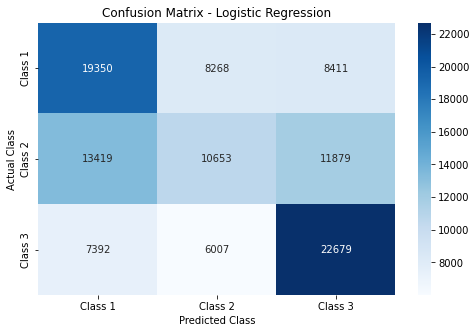

In [ ]:
y_pred = lr.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=lr_pred1)

index = ["Class 1", "Class 2", "Class 3"]
columns = ["Class 1", "Class 2", "Class 3"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

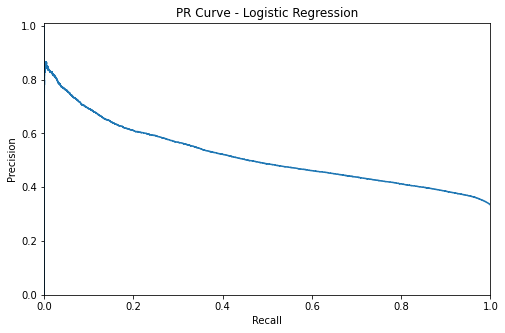

In [ ]:
Y = label_binarize(y_test, classes=[1, 2, 3])

y_score = lr.predict_proba(x_test)

precision["Logistic Regression"], recall["Logistic Regression"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(8, 5))
plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Logistic Regression")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())
roc_auc1 = auc(fpr["Logistic Regression"], tpr["Logistic Regression"])
roc_auc1

0.680926102807666

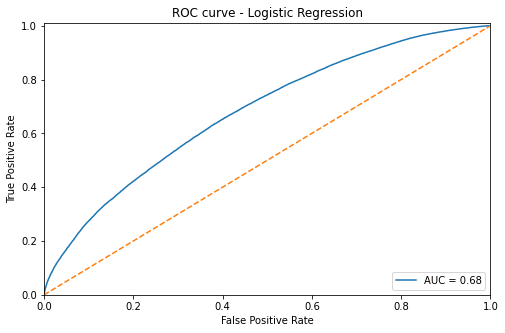

In [ ]:
plt.figure(figsize=(8, 5))
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post", label = 'AUC = %0.2f' % roc_auc1)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.legend(loc = 'lower right')
plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [ ]:
# importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=["importance"], index=x_train.columns)

# importances.iloc[:,0] = lr.feature_importances_

# importances = importances.sort_values(by="importance", ascending=False)[:]

# plt.figure(figsize=(10, 6))
# sns.barplot(x="importance", y=importances.index, data=importances)
# plt.title("Visualizing Important Features - Logistic Regression")
# plt.xlabel('Features Importance Score')
# plt.ylabel('Features')
# plt.show()

### **DEEP LEARNING**

In [ ]:
x=accident_data[["Number_of_Vehicles","Light_Conditions","Weather_Conditions","Road_Surface_Conditions","Urban_or_Rural_Area", "Number_of_Casualties",
"Age_Group_of_Casualty","Crash_Type", "Did_Police_Officer_Attend_Scene_of_Accident","Road_Class", "Day_of_Week","Month","Year"]]
y=accident_data["Accident_Severity"]

In [ ]:
y.unique()

array([1, 3, 2])

In [ ]:
y=y-1

In [ ]:
x=x.astype(np.float)
x

,Number_of_Vehicles,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Number_of_Casualties,Age_Group_of_Casualty,Crash_Type,Did_Police_Officer_Attend_Scene_of_Accident,Road_Class,Day_of_Week,Month,Year
0,0.000000,0.00,0.2,0.0,0.0,0.000000,0.428571,0.8,0.0,0.0,0.333333,0.000000,0.0
1,0.000000,0.25,0.0,0.0,0.0,0.000000,0.142857,0.1,0.0,0.0,0.500000,0.000000,0.0
2,0.333333,0.25,0.0,0.0,0.0,0.000000,0.714286,0.8,0.0,0.0,0.666667,0.000000,0.0
3,0.000000,0.00,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,0.833333,0.000000,0.0
4,0.000000,0.75,0.2,0.0,0.0,0.000000,1.000000,0.7,0.0,0.0,0.166667,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212162,0.333333,0.25,0.0,0.5,0.0,0.000000,1.000000,0.7,0.5,0.5,0.000000,0.000000,1.0
212163,0.333333,0.25,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.5,0.666667,0.090909,1.0
212164,0.333333,0.25,0.0,0.0,0.0,0.000000,0.428571,0.3,0.5,0.5,0.166667,0.000000,1.0
212165,0.333333,0.00,0.0,0.0,0.0,0.000000,0.428571,0.3,0.0,0.5,0.333333,0.000000,1.0


In [ ]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
  dist = round(v / len(y) * 100, 2)
  print(f"Class={k}, n={v} ({dist})")

Class=0, n=4328 (2.04)
Class=2, n=180096 (84.88)
Class=1, n=27743 (13.08)


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import  Pipeline

In [ ]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample), ("u", undersample)]
pipeline = Pipeline(steps=steps)
x, y =pipeline.fit_resample(x, y)

In [ ]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
  dist = round(v / len(y) * 100, 2)
  print(f"Class={k}, n={v} ({dist})")

Class=0, n=180096 (33.33)
Class=1, n=180096 (33.33)
Class=2, n=180096 (33.33)


In [ ]:
scaler = MinMaxScaler()
features = ["Number_of_Vehicles","Light_Conditions","Weather_Conditions","Road_Surface_Conditions","Urban_or_Rural_Area", "Number_of_Casualties",
"Age_Group_of_Casualty","Crash_Type", "Did_Police_Officer_Attend_Scene_of_Accident","Road_Class", "Day_of_Week","Month","Year"]
accident_data[features] = scaler.fit_transform(accident_data[features])
accident_data.head()

,Accident_Index,Accident_Severity,Age_of_Driver,Sex_of_Casualty,Number_of_Casualties,Age_Group_of_Casualty,Day_of_Week,Month,Year,Light_Conditions,Weather_Conditions,Road_Type,Road_Class,Road_Surface_Conditions,Crash_Type,Number_of_Vehicles,Urban_or_Rural_Area,Region,Did_Police_Officer_Attend_Scene_of_Accident
0,1991ACC00001,1,37,1,0.0,0.428571,0.333333,0.0,0.0,0.00,0.2,2,0.0,0.0,0.8,0.000000,0.0,1,0.0
1,1991ACC00002,1,42,1,0.0,0.142857,0.500000,0.0,0.0,0.25,0.0,2,0.0,0.0,0.1,0.000000,0.0,1,0.0
2,1991ACC00003,3,35,1,0.0,0.714286,0.666667,0.0,0.0,0.25,0.0,1,0.0,0.0,0.8,0.333333,0.0,1,0.0
3,1991ACC00004,3,62,1,0.0,0.714286,0.833333,0.0,0.0,0.00,0.0,2,0.0,0.0,0.0,0.000000,0.0,1,0.0
4,1991ACC00005,3,49,1,0.0,1.000000,0.166667,0.0,0.0,0.75,0.2,2,0.0,0.0,0.7,0.000000,0.0,1,0.0


In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=0.80, random_state=99)

In [ ]:
inputs = tf.keras.Input(shape=(x.shape[1],))
x = tf.keras.layers.Dense(64, activation="relu")(inputs)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(3, activation="softmax")(x)

# import keras
# from keras.models import Sequential
# from keras.layers import Activation
# model = tf.keras.Sequential([
#                     keras.layers.Dense(64, input_shape=(x.shape[1],), activation='relu'),
#                     keras.layers.Dropout(0.5),
#                     keras.layers.Dense(64, activation='relu'),
#                     keras.layers.Dropout(0.5),
#                     keras.layers.Dense(3, activation='softmax')
# ])

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

batch_size = 32
epochs = 200

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    # callbacks=[
    #            tf.keras.callbacks.ReduceLROnPlateau(),
    #            tf.keras.callbacks.EarlyStopping(
    #                monitor = "val_loss",
    #                patience=3,
    #                restore_best_weights=True
    #            )
    # ]
)

Epoch 1/200
10806/10806 [==============================] - 25s 2ms/step - loss: 0.9301 - accuracy: 0.5382 - val_loss: 0.9127 - val_accuracy: 0.5492
Epoch 2/200
10806/10806 [==============================] - 26s 2ms/step - loss: 0.8958 - accuracy: 0.5619 - val_loss: 0.8845 - val_accuracy: 0.5708
Epoch 3/200
10806/10806 [==============================] - 24s 2ms/step - loss: 0.8601 - accuracy: 0.5841 - val_loss: 0.8454 - val_accuracy: 0.5914
Epoch 4/200
10806/10806 [==============================] - 26s 2ms/step - loss: 0.8324 - accuracy: 0.6018 - val_loss: 0.8199 - val_accuracy: 0.6087
Epoch 5/200
10806/10806 [==============================] - 26s 2ms/step - loss: 0.8068 - accuracy: 0.6161 - val_loss: 0.8095 - val_accuracy: 0.6088
Epoch 6/200
10806/10806 [==============================] - 24s 2ms/step - loss: 0.7874 - accuracy: 0.6255 - val_loss: 0.8193 - val_accuracy: 0.5908
Epoch 7/200
10806/10806 [==============================] - 25s 2ms/step - loss: 0.7740 - accuracy: 0.6320 - val_

In [ ]:
acc_train = round(model.evaluate(x_train, y_train, verbose=0)[1] * 100, 2)
acc_test = round(model.evaluate(x_test, y_test, verbose=0)[1] * 100, 2)

In [ ]:
 print("Train Accuracy:",  acc_train)
 print("Test Accuracy:", acc_test)
 #Append to the accuracy list
accuracy_lst.append(acc_test)

Train Accuracy: 70.79
Test Accuracy: 70.14


In [ ]:
anny_pred = model.predict(x_test)
rounded_predicted_labels = np.argmax(anny_pred, axis=1)

In [ ]:
f1_Score3 = round(f1_score(y_test, rounded_predicted_labels, average='macro') * 100, 2)
P_Score3 = round(precision_score(y_test, rounded_predicted_labels, average='macro') * 100, 2)
R_Score3 = round(recall_score(y_test, rounded_predicted_labels, average='macro') * 100, 2)

In [ ]:
print("Precision Score:", P_Score3)
print("F1 Score:", f1_Score3)
print("Recall Score:", R_Score3)
precision_lst.append(P_Score3)
f1Score_lst.append(f1_Score3)
recall_lst.append(R_Score3)

Precision Score: 69.93
F1 Score: 68.78
Recall Score: 70.07


In [ ]:
print('\nClassification Report for Testing\n')
print(classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=rounded_predicted_labels, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report for Testing

              precision    recall  f1-score   support

     Class 1     0.7565    0.8778    0.8127     36029
     Class 2     0.6868    0.4427    0.5384     35951
     Class 3     0.6545    0.7815    0.7124     36078

    accuracy                         0.7009    108058
   macro avg     0.6993    0.7007    0.6878    108058
weighted avg     0.6993    0.7009    0.6879    108058



In [ ]:
import itertools
cm_ann = confusion_matrix(y_true=y_test, y_pred=rounded_predicted_labels)

In [ ]:
cm_ann

array([[31626,  2589,  1814],
       [ 6965, 15916, 13070],
       [ 3212,  4670, 28196]])

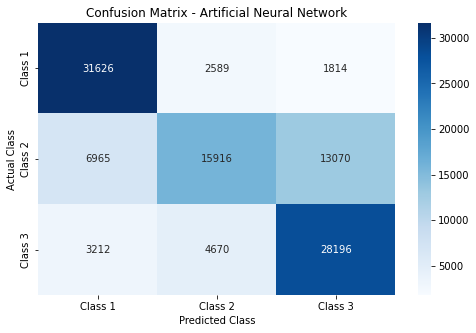

In [ ]:
index = ["Class 1", "Class 2", "Class 3"]
columns = ["Class 1", "Class 2", "Class 3"]
conf_matrix = pd.DataFrame(data=cm_ann, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - Artificial Neural Network")
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [ ]:
print('Summary of the result after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the result after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
195,0.621957,0.708222,0.644795,0.698737,195
196,0.622047,0.707823,0.645379,0.695521,196
197,0.621738,0.708784,0.642682,0.696655,197
198,0.621512,0.707858,0.641863,0.698725,198
199,0.621786,0.708217,0.648822,0.697615,199


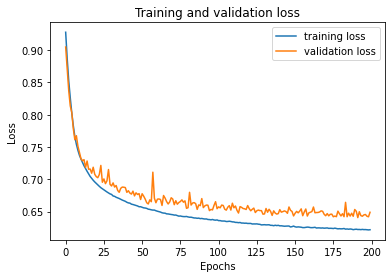

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

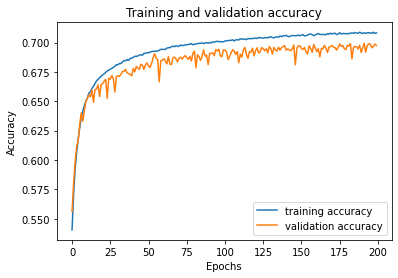

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [ ]:
# importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=["importance"], index=x_train.columns)

# importances.iloc[:,0] = model.feature_importances_

# importances = importances.sort_values(by="importance", ascending=False)[:]

# plt.figure(figsize=(10, 6))
# sns.barplot(x="importance", y=importances.index, data=importances)
# plt.title("Visualizing Important Features - ANN")
# plt.xlabel('Features Importance Score')
# plt.ylabel('Features')
# plt.show()

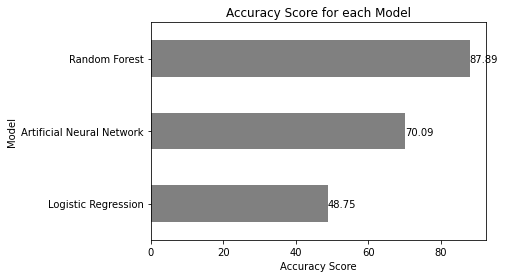

In [ ]:
# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Model','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a plot
ax=df_acc.plot.barh('Model', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
#plt.xlim(0,2.05)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Model'], rotation=0)
plt.title('Accuracy Score for each Model')

plt.show()

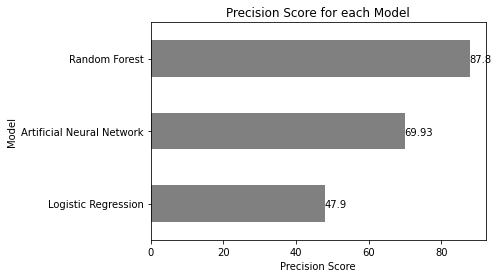

In [ ]:
# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, precision_lst)), columns=['Model','Precision_Score']).sort_values(by=['Precision_Score'],ascending = True)

# Make a plot
ax=df_acc.plot.barh('Model', 'Precision_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
#plt.xlim(0,2.05)
plt.xlabel('Precision Score')
plt.yticks(y_ticks, df_acc['Model'], rotation=0)
plt.title('Precision Score for each Model')

plt.show()

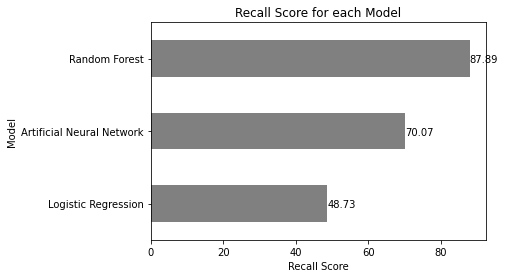

In [ ]:
# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, recall_lst)), columns=['Model','Recall_Score']).sort_values(by=['Recall_Score'],ascending = True)

# Make a plot
ax=df_acc.plot.barh('Model', 'Recall_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
#plt.xlim(0,2.05)
plt.xlabel('Recall Score')
plt.yticks(y_ticks, df_acc['Model'], rotation=0)
plt.title('Recall Score for each Model')

plt.show()

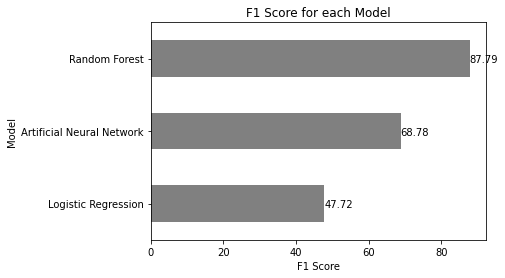

In [ ]:
y_ticks=np.arange(len(algo_lst))
df_acc=pd.DataFrame(list(zip(algo_lst, f1Score_lst)), columns=['Model','F1_Score']).sort_values(by=['F1_Score'],ascending = True)
ax=df_acc.plot.barh('Model', 'F1_Score', align='center',legend=False,color='0.5')
for i in ax.patches:
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

plt.xlabel('F1 Score')
plt.yticks(y_ticks, df_acc['Model'], rotation=0)
plt.title('F1 Score for each Model')

plt.show()